In [1]:
#这个lgb放分类特征
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sbn
import pandas as pd
import lightgbm as lgb
import datetime 
import math 
import gc
import os

In [2]:
#输入文件
DATA_PATH = os.path.join(os.getcwd(),'data','simply_id','input')
NEW_TRAIN  =  os.path.join(DATA_PATH,'new_train.csv')
NEW_TEST = os.path.join(DATA_PATH,'new_test.csv')

In [3]:
train = pd.read_csv(NEW_TRAIN)
test = pd.read_csv(NEW_TEST)

In [4]:
print(train.columns)
print(test.columns)

Index(['msno', 'song_id', 'op_type', 'city', 'registered_via',
       'registration_init_time', 'song_length', 'song_year', 'first_genre_id',
       'artist_name_id', 'lyricist_id', 'language_id',
       'lyricist_id_song_cnt_1', 'artist_name_id_song_cnt_1',
       'language_id_song_cnt_1', 'first_genre_id_song_cnt_1',
       'song_length_song_cnt_1', 'song_year_song_cnt_1', 'target',
       'song_id_re_rate', 'song_length_re_rate', 'song_year_re_rate',
       'first_genre_id_re_rate', 'artist_name_id_re_rate',
       'lyricist_id_re_rate', 'language_id_re_rate', 'song_id_cnt_1',
       'song_length_cnt_1', 'song_year_cnt_1', 'first_genre_id_cnt_1',
       'artist_name_id_cnt_1', 'lyricist_id_cnt_1', 'language_id_cnt_1',
       'msno_cnt_1', 'msno_re_rate', 'city_cnt_1', 'city_re_rate',
       'registered_via_cnt_1', 'registered_via_re_rate',
       'registration_init_time_cnt_1', 'registration_init_time_re_rate',
       'op_type_cnt_1', 'op_type_re_rate'],
      dtype='object')
Index(

In [5]:
train = train[['msno', 'song_id', 'op_type', 'city', 'registered_via',
       'registration_init_time', 'song_length', 'song_year', 'first_genre_id',
       'artist_name_id', 'lyricist_id', 'language_id','target']]
test = test[['msno', 'song_id', 'op_type', 'city', 'registered_via',
       'registration_init_time', 'song_length', 'song_year', 'first_genre_id',
       'artist_name_id', 'lyricist_id', 'language_id','target']]

In [6]:
for col in train.columns:
    if train[col].dtype == object:
        train[col] = train[col].astype('category')
for col in test.columns:
    if test[col].dtype == object:
        test[col] = test[col].astype('category')

In [7]:
X_train = train.drop(['target'], axis=1).values
y_train = train['target'].values
X_test = test.drop(['target'], axis=1).values
y_test = test['target'].values

In [8]:
d_train_final = lgb.Dataset(X_train, y_train)
watchlist_final = lgb.Dataset(X_test, y_test)

In [9]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.1,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.9,
        'bagging_freq': 2,
        'bagging_seed': 3,
        'feature_fraction': 0.8,
        'feature_fraction_seed': 2,
        'max_bin': 256,
        'max_depth': 12,
        'num_rounds': 500,
        'metric' : 'auc',
        'using_missing' : False,
        'is_unbalance' : True
        #'sigmoid' : 1.0 ,
        #'train_metric' : True
    }

In [10]:
%time model_f1 = lgb.train(params, train_set=d_train_final,  valid_sets=watchlist_final,verbose_eval=5)

D:\Users\10100\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's auc: 0.671558
[10]	valid_0's auc: 0.673754
[15]	valid_0's auc: 0.677135
[20]	valid_0's auc: 0.679195
[25]	valid_0's auc: 0.681254
[30]	valid_0's auc: 0.683687
[35]	valid_0's auc: 0.685079
[40]	valid_0's auc: 0.687176
[45]	valid_0's auc: 0.688891
[50]	valid_0's auc: 0.690753
[55]	valid_0's auc: 0.691887
[60]	valid_0's auc: 0.6934
[65]	valid_0's auc: 0.694531
[70]	valid_0's auc: 0.695921
[75]	valid_0's auc: 0.696995
[80]	valid_0's auc: 0.698305
[85]	valid_0's auc: 0.699262
[90]	valid_0's auc: 0.699888
[95]	valid_0's auc: 0.70099
[100]	valid_0's auc: 0.701985
[105]	valid_0's auc: 0.702604
[110]	valid_0's auc: 0.703439
[115]	valid_0's auc: 0.70427
[120]	valid_0's auc: 0.70495
[125]	valid_0's auc: 0.705763
[130]	valid_0's auc: 0.706302
[135]	valid_0's auc: 0.707335
[140]	valid_0's auc: 0.707992
[145]	valid_0's auc: 0.708533
[150]	valid_0's auc: 0.709168
[155]	valid_0's auc: 0.709566
[160]	valid_0's auc: 0.710007
[165]	valid_0's auc: 0.710608
[170]	valid_0's auc: 0.711049
[175]

In [11]:
from sklearn import metrics
from scipy import interp 
cm_train = metrics.confusion_matrix(y_train,model_f1.predict(X_train).round())  #训练样本的混淆矩阵
print(cm_train)
cm_test = metrics.confusion_matrix(y_test,model_f1.predict(X_test).round())  #训练样本的混淆矩阵
print(cm_test)

[[1449342  823987]
 [ 757305 1837217]]
[[359450 208560]
 [192317 456636]]


In [12]:
p_test_1 = model_f1.predict(X_test).round()
p_test_1[:5]

array([ 0.,  1.,  1.,  0.,  1.])

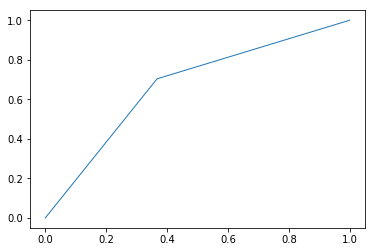

In [13]:
#roc曲线
fpr, tpr, thresholds = metrics.roc_curve(y_test, p_test_1,pos_label = 1)##指定正例标签，pos_label = ###########在数之联的时候学到的，要制定正例 
mean_fpr = np.linspace(0, 1, 100) 
mean_tpr = 0.0 #初始处为0 
mean_tpr += interp(mean_fpr, fpr, tpr)          #对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数    
                                 
roc_auc = metrics.auc(fpr, tpr)    
#画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来    
plt.plot(fpr, tpr, lw=1, label='ROC  (area = %0.3f)' % roc_auc) 
plt.show()